In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

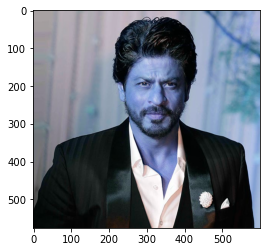

In [2]:
sample = cv2.imread('/home/dcslab/Downloads/bollywood_celeb_faces2/Shah_Rukh_Khan/8.jpg')
plt.imshow(sample)

In [3]:
sample.shape

(576, 600, 3)

In [4]:
gray_img = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
gray_img.shape

(576, 600)

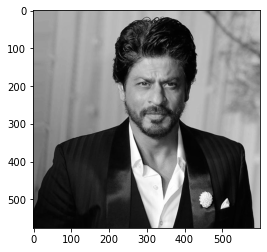

In [5]:
plt.imshow(gray_img, cmap= 'gray')

# Importing and Applying Haarcascade on face and eyes

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.5, 6)

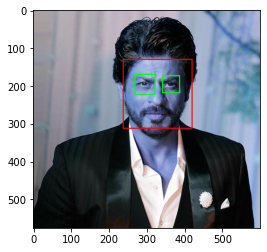

In [7]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(sample,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap= 'gray')
plt.show()

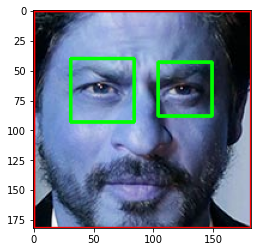

In [8]:
plt.imshow(roi_color, cmap='gray')

# Function to get a cropped face from the images

In [9]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

### Testing our custom function 

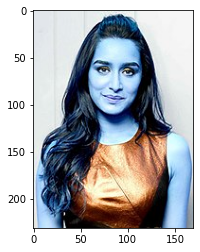

In [10]:
original_image = cv2.imread(r'C:\Users\pranj\Desktop\Datasets\Image Classification Datasets\bollywood_celeb_faces2\Shraddha_Kapoor\20.jpg')
plt.imshow(original_image)

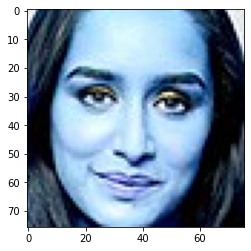

In [11]:
cropped_image = get_cropped_image_if_2_eyes('/home/dcslab/Downloads/bollywood_celeb_faces2/Shraddha_Kapoor/20.jpg')
plt.imshow(cropped_image)

In [12]:
import os
import shutil
path_to_data = '/home/dcslab/Downloads/bollywood_celeb_faces2/'
path_to_cr_data = '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/'

In [13]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [14]:
img_dirs

['/home/dcslab/Downloads/bollywood_celeb_faces2/Shah_Rukh_Khan',
 '/home/dcslab/Downloads/bollywood_celeb_faces2/Sonam_Kapoor',
 '/home/dcslab/Downloads/bollywood_celeb_faces2/Shraddha_Kapoor',
 '/home/dcslab/Downloads/bollywood_celeb_faces2/Salman_Khan',
 '/home/dcslab/Downloads/bollywood_celeb_faces2/Sushant_Singh_Rajput']

In [15]:
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# Generating cropped face images in cropped folder

In [16]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Shah_Rukh_Khan
Generating cropped images in folder:  /home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan
Sonam_Kapoor
Generating cropped images in folder:  /home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Sonam_Kapoor
Shraddha_Kapoor
Generating cropped images in folder:  /home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shraddha_Kapoor
Salman_Khan
Generating cropped images in folder:  /home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Salman_Khan
Sushant_Singh_Rajput
Generating cropped images in folder:  /home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Sushant_Singh_Rajput


In [17]:
celebrity_file_names_dict

{'Shah_Rukh_Khan': ['/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan1.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan2.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan3.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan4.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan5.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan6.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan7.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan8.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan9.jpg',
  '/home/dcslab/Downloads/bollywood_celeb_faces2/cropped/Shah_Rukh_Khan/Shah_Rukh_Khan10.jpg',
  '/home/dcslab/Downloads/bollywood_celeb

### Making a dictionary for the celebs

In [18]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Shah_Rukh_Khan': 0,
 'Sonam_Kapoor': 1,
 'Shraddha_Kapoor': 2,
 'Salman_Khan': 3,
 'Sushant_Singh_Rajput': 4}

### Function to resize, scale and append the indexes to all the images in the sub-folders

In [295]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC)
        scalled_raw_img = scalled_raw_img/467
        x.append(scalled_raw_img)
        y.append(class_dict[celebrity_name])     

In [296]:
scalled_raw_img.shape

(32, 32, 3)

In [297]:
print("lenth of x: ",len(x), "length of y: ",len(y))

lenth of x:  467 length of y:  467


In [298]:
type(x)

list

In [299]:
X = np.array(x).astype(float)
X.shape

(467, 32, 32, 3)

In [300]:
Y = np.array(y)
Y.shape

(467,)

# Using VGG16 Transformer 

In [355]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [395]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [396]:
for layer in vgg.layers:
    layer.trainable=False

# Building model on VGG16 Transformer 

In [407]:

x = keras.layers.Flatten()(vgg.output)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dense(256,activation='relu')(x)
x = keras.layers.Dense(512,activation='relu')(x)

prediction = keras.layers.Dense(5,activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

### Compiling and Fitting model

In [408]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [409]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
12/12 [==============================] - 1s 44ms/step - loss: 1.5837 - accuracy: 0.3083
Epoch 2/20
12/12 [==============================] - 1s 45ms/step - loss: 1.3904 - accuracy: 0.4316
Epoch 3/20
12/12 [==============================] - 1s 45ms/step - loss: 1.2487 - accuracy: 0.4772
Epoch 4/20
12/12 [==============================] - 1s 44ms/step - loss: 1.1305 - accuracy: 0.5335
Epoch 5/20
12/12 [==============================] - 1s 44ms/step - loss: 1.0042 - accuracy: 0.6327
Epoch 6/20
12/12 [==============================] - 1s 44ms/step - loss: 0.9119 - accuracy: 0.6542
Epoch 7/20
12/12 [==============================] - 1s 44ms/step - loss: 0.7629 - accuracy: 0.6917
Epoch 8/20
12/12 [==============================] - 1s 44ms/step - loss: 0.6534 - accuracy: 0.7587
Epoch 9/20
12/12 [==============================] - 1s 44ms/step - loss: 0.6240 - accuracy: 0.7587
Epoch 10/20
12/12 [==============================] - 1s 44ms/step - loss: 0.4812 - accuracy: 0.8365
Epoch 11/

#### importing downloaded file for testing the model

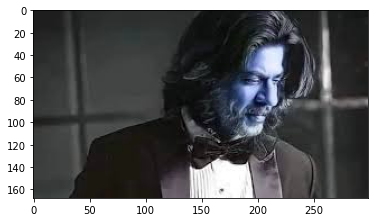

In [410]:
srk = cv2.imread('/home/dcslab/Desktop/sh.jpeg')
plt.imshow(srk)

In [411]:
srk.shape

(168, 299, 3)

In [414]:
def processing_image(img):
    img = cv2.resize(img, (32, 32))
    img = np.array(img).reshape(-1,32,32,3)
    result = np.argmax(model.predict(img))
    return result

### Prediciton

In [415]:
processing_image(srk)

1/1 [==============================] - 0s 112ms/step


0

As we had indexed 0 for 'Shahrukh Khan' this means it is giving right predictions with 95% accuracy